# Multiple Linear Regression

## Import all relevant and necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Comprehending the data

In [2]:
bike_dataframe = pd.read_csv(r'D:\UPGRAD\Case_Study\BoomBikes\day.csv')
bike_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check for shape of the dataset
bike_dataframe.shape

(730, 16)

In [4]:
#gather information about data
#Checking for count and the type of data present in the given dataset
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_dataframe.size

11680

## Data Cleaning

In [7]:
# check for missing values
bike_dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### As part of data cleaning, dropping following columns
- instant: since it is merely index of every record in the dataset
- dteday: this information of date is also available in year, month columns
- casual and registered: since 'cnt' column has summation of these two values

In [8]:
bike_dataframe.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
# dropping the duplicates
bike_dataframe.drop_duplicates(inplace=True)

In [10]:
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### As the shape remains after dropping duplicates, which indicates that there are no duplicates in the dataframe

# Changing categorical data which were primarily numeric to more meaningful one

In [11]:
# Encoding/mapping the season column

bike_dataframe.season = bike_dataframe.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column

bike_dataframe.mnth = bike_dataframe.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column

bike_dataframe.weekday = bike_dataframe.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column

bike_dataframe.weathersit = bike_dataframe.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

bike_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualizing the data

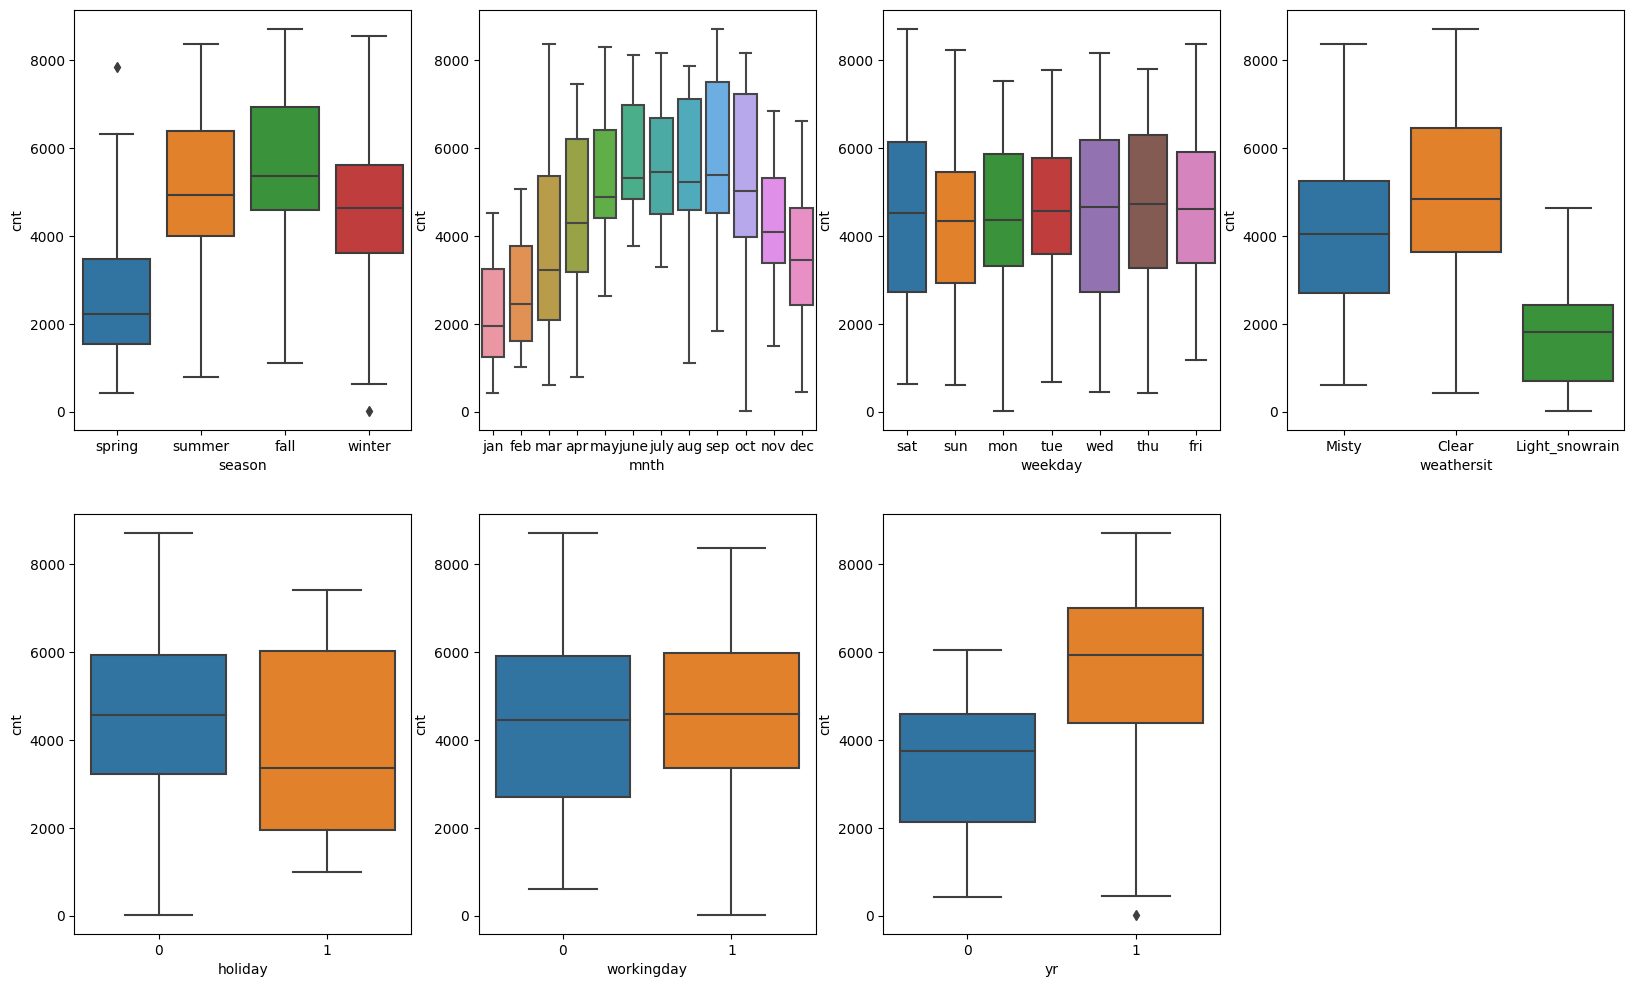

In [12]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_dataframe)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_dataframe)
plt.show()

In [13]:
# function to create barplot related to categorical columns

def plt_catgy_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_dataframe)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_dataframe, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

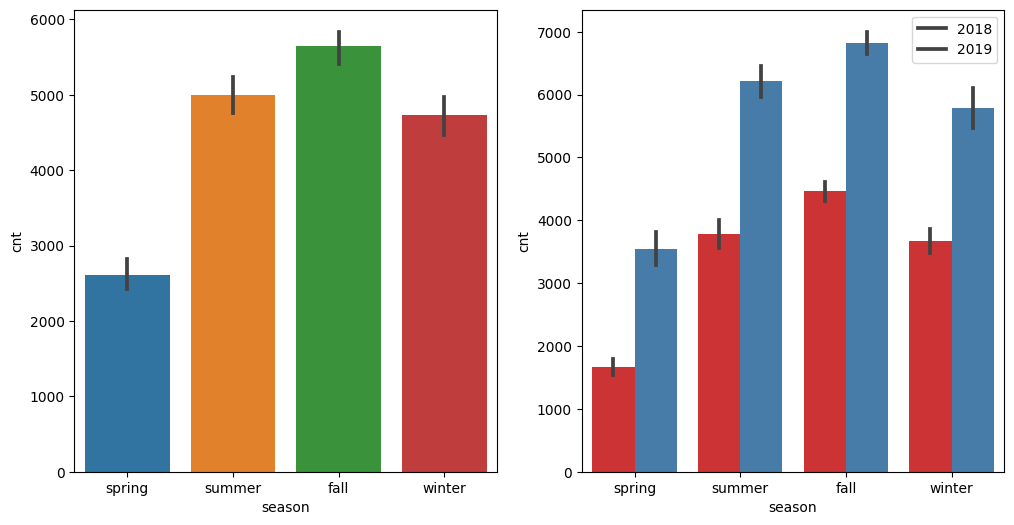

In [14]:
# plotting visualization for season column

plt_catgy_columns('season')

### Fall seems to have more traction to booking. Furthermore, in each season, count of bookings has increased rapidly from 2018 to 2019

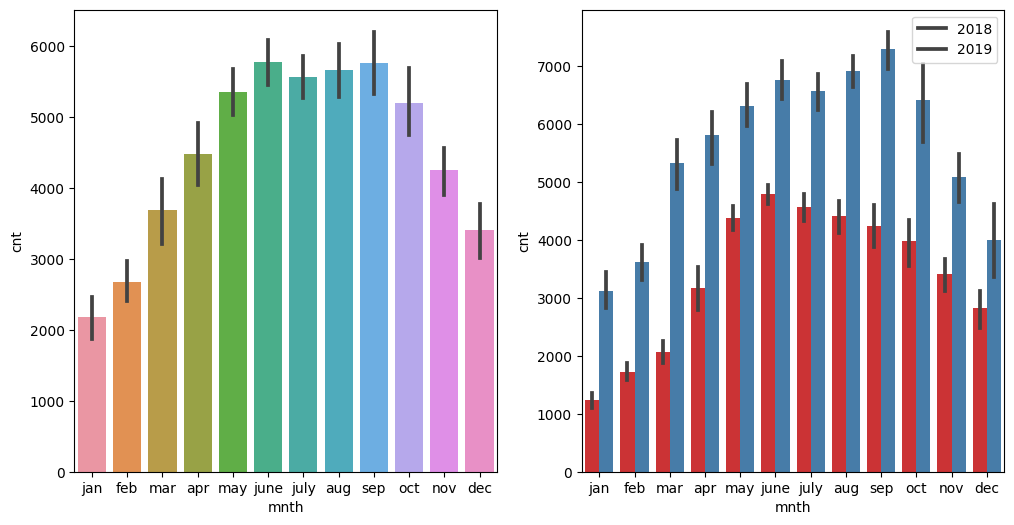

In [15]:
# plotting visualization for month column

plt_catgy_columns('mnth')

### Maximum of bookings has been done between the months of May to Oct, following which the booking trend has decreased until the end of the year. And comparatively number of bookings have tremendously increased in the year 2019 from 2018.

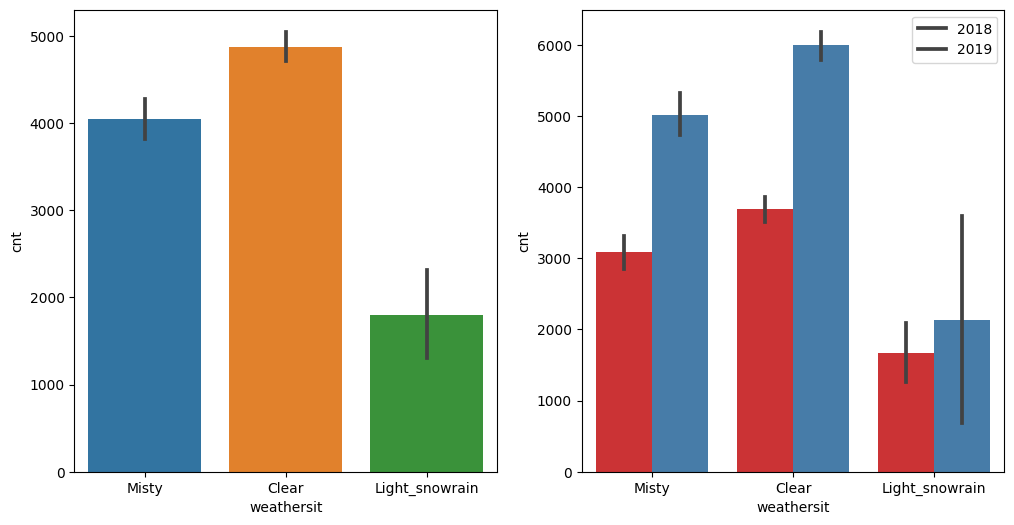

In [16]:
# plotting visualization for weathersit column

plt_catgy_columns('weathersit')

### From the above graphs, it seems obvious that clear weather attracted more bookings, while standing with same conclusion that with each weather state, 2019 has seen more number of bookings than that of 2018.

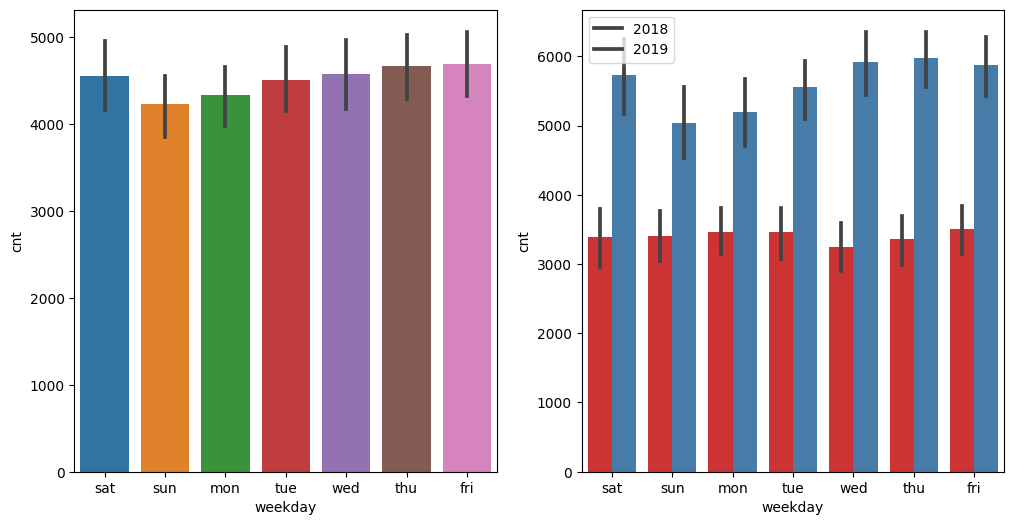

In [17]:
# plotting visualization for weekday column

plt_catgy_columns('weekday')

### It is natural to notice to conclude that end of the week - Thurs, Fri and Sat, sees more bookings than rest of the days, same goes with the conclusion in the year 2019

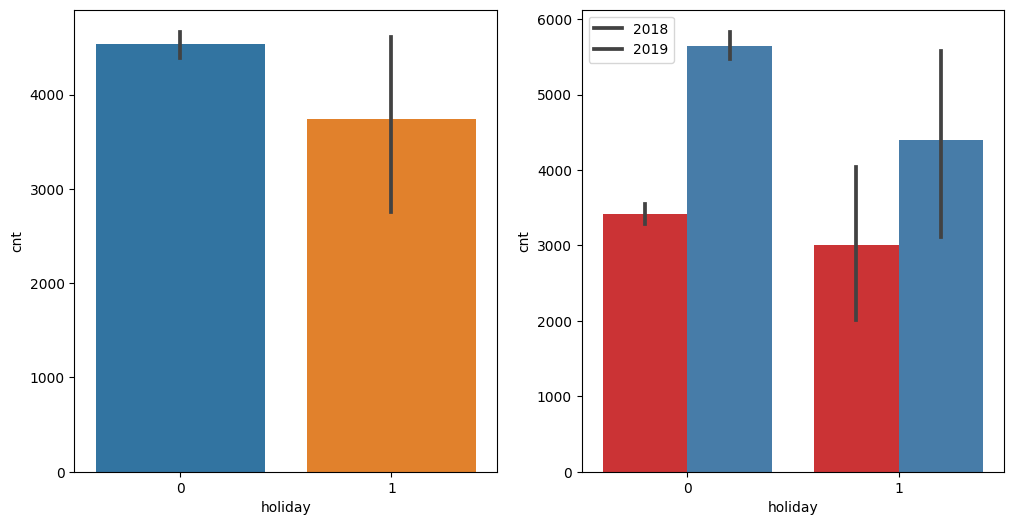

In [18]:
# plotting visualization for holiday column

plt_catgy_columns('holiday')

### It is very evident that bookings have enormous increase in its count on holidays

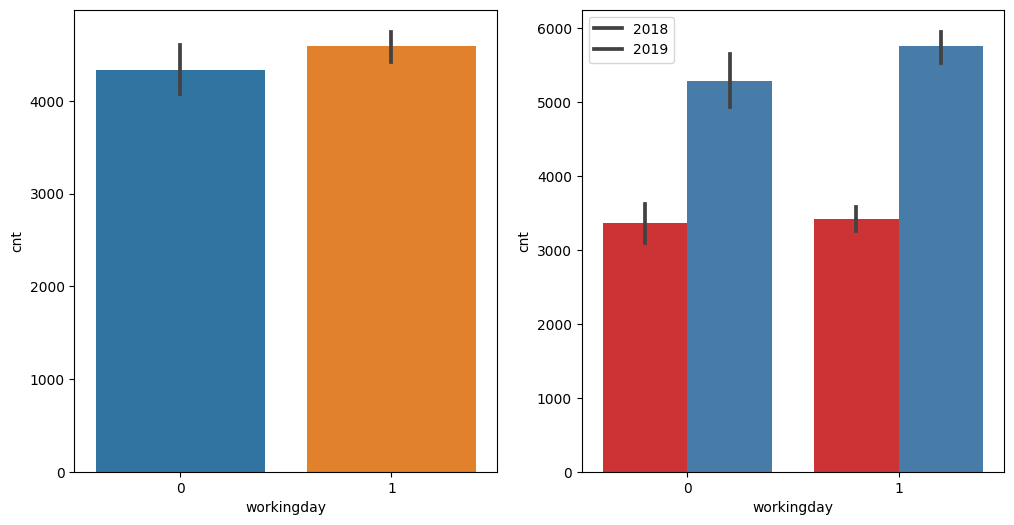

In [19]:
# plotting visualization for workingday column

plt_catgy_columns('workingday')

### There is slight increase with bookings on the working day, which may imply that customers might prefer to pick a bike for their work more.

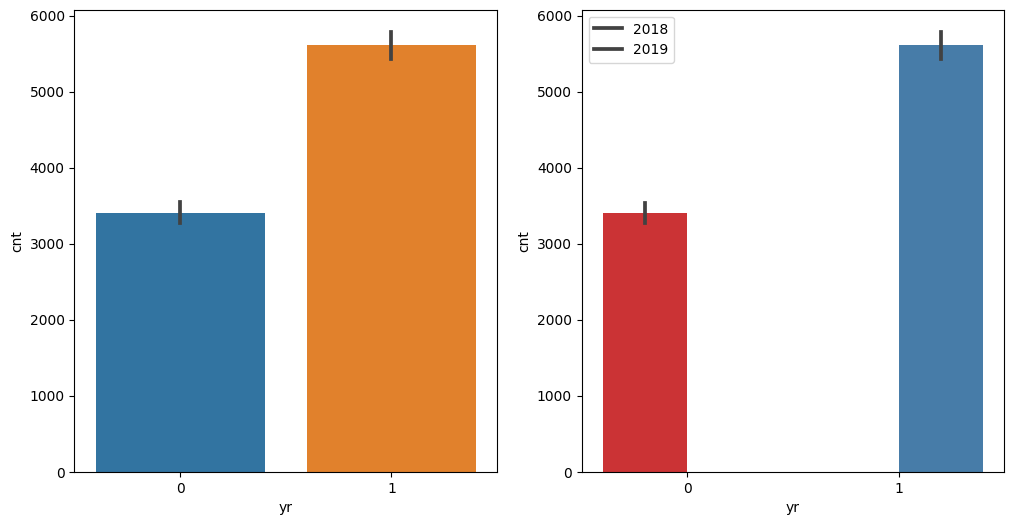

In [20]:
# plotting visualization for year column

plt_catgy_columns('yr')

### Clear evidence that year 2019 has attracted more bookings than year 2018

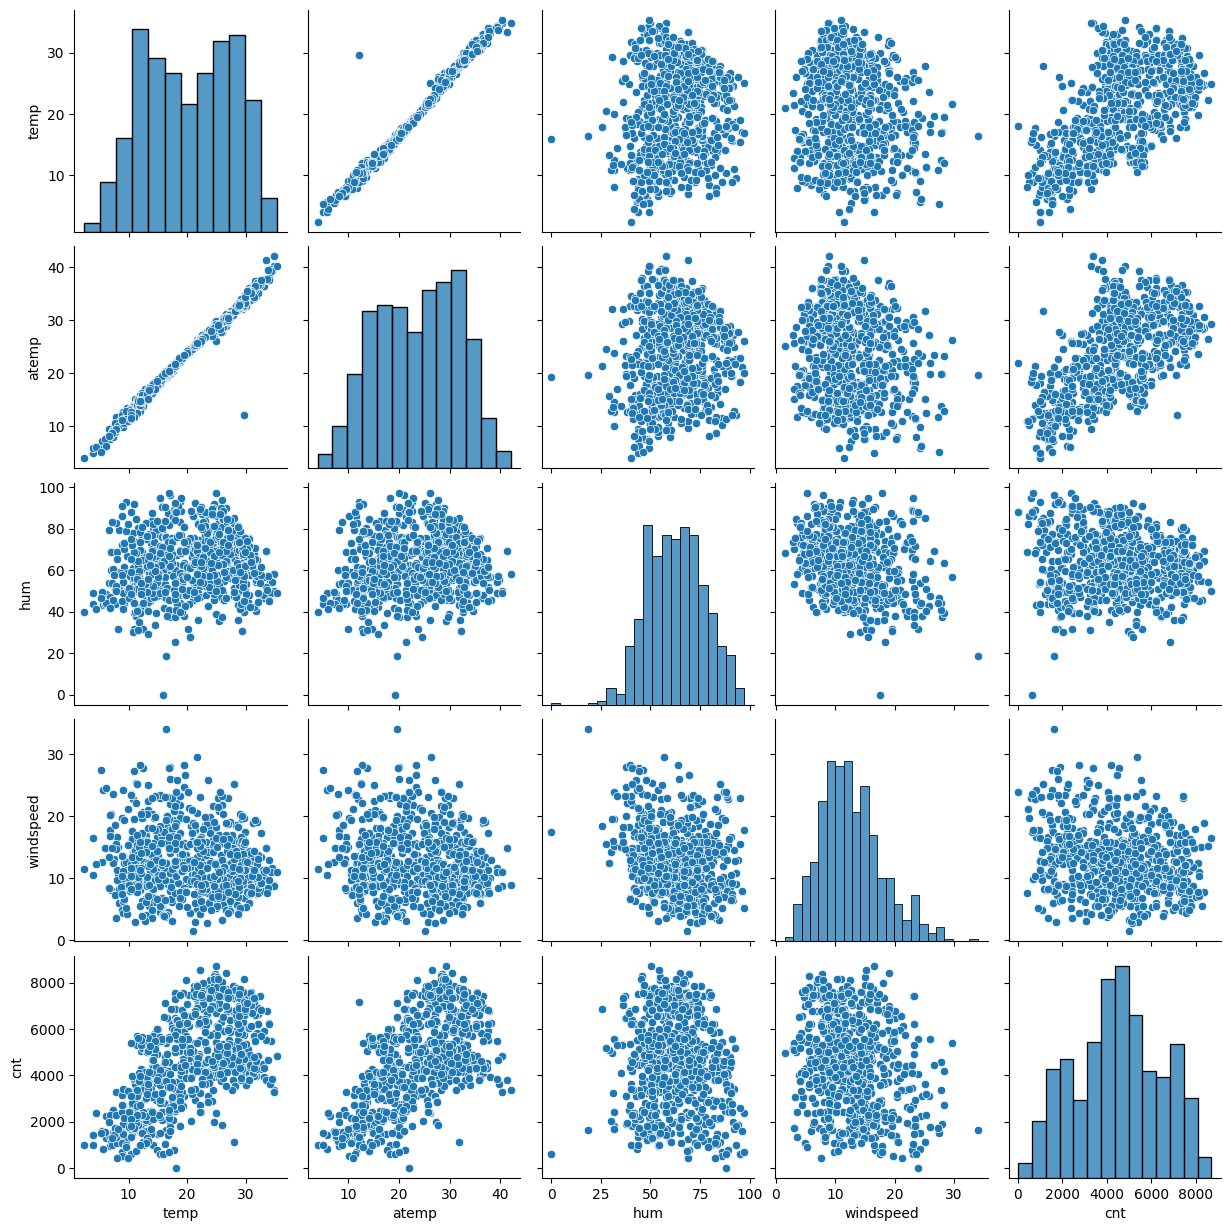

In [21]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_dataframe,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

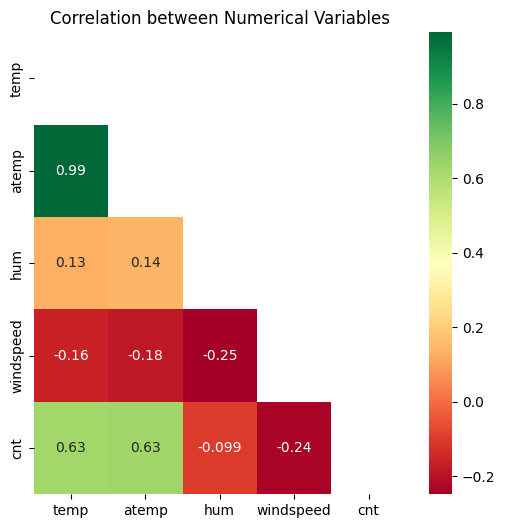

In [22]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_dataframe[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_dataframe[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

### The realtionship between 'temp' and 'atemp' are highly linear and hence these two parameters cannot be used together in model building due to multicollinearity.

# Data Preparation

In [23]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_dataframe.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_dataframe.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_dataframe.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_dataframe.season,drop_first=True)

bike_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([bike_dataframe,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

# Splitting new dataframe into Train and Test sets

In [26]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [27]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [28]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [29]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [30]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [33]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


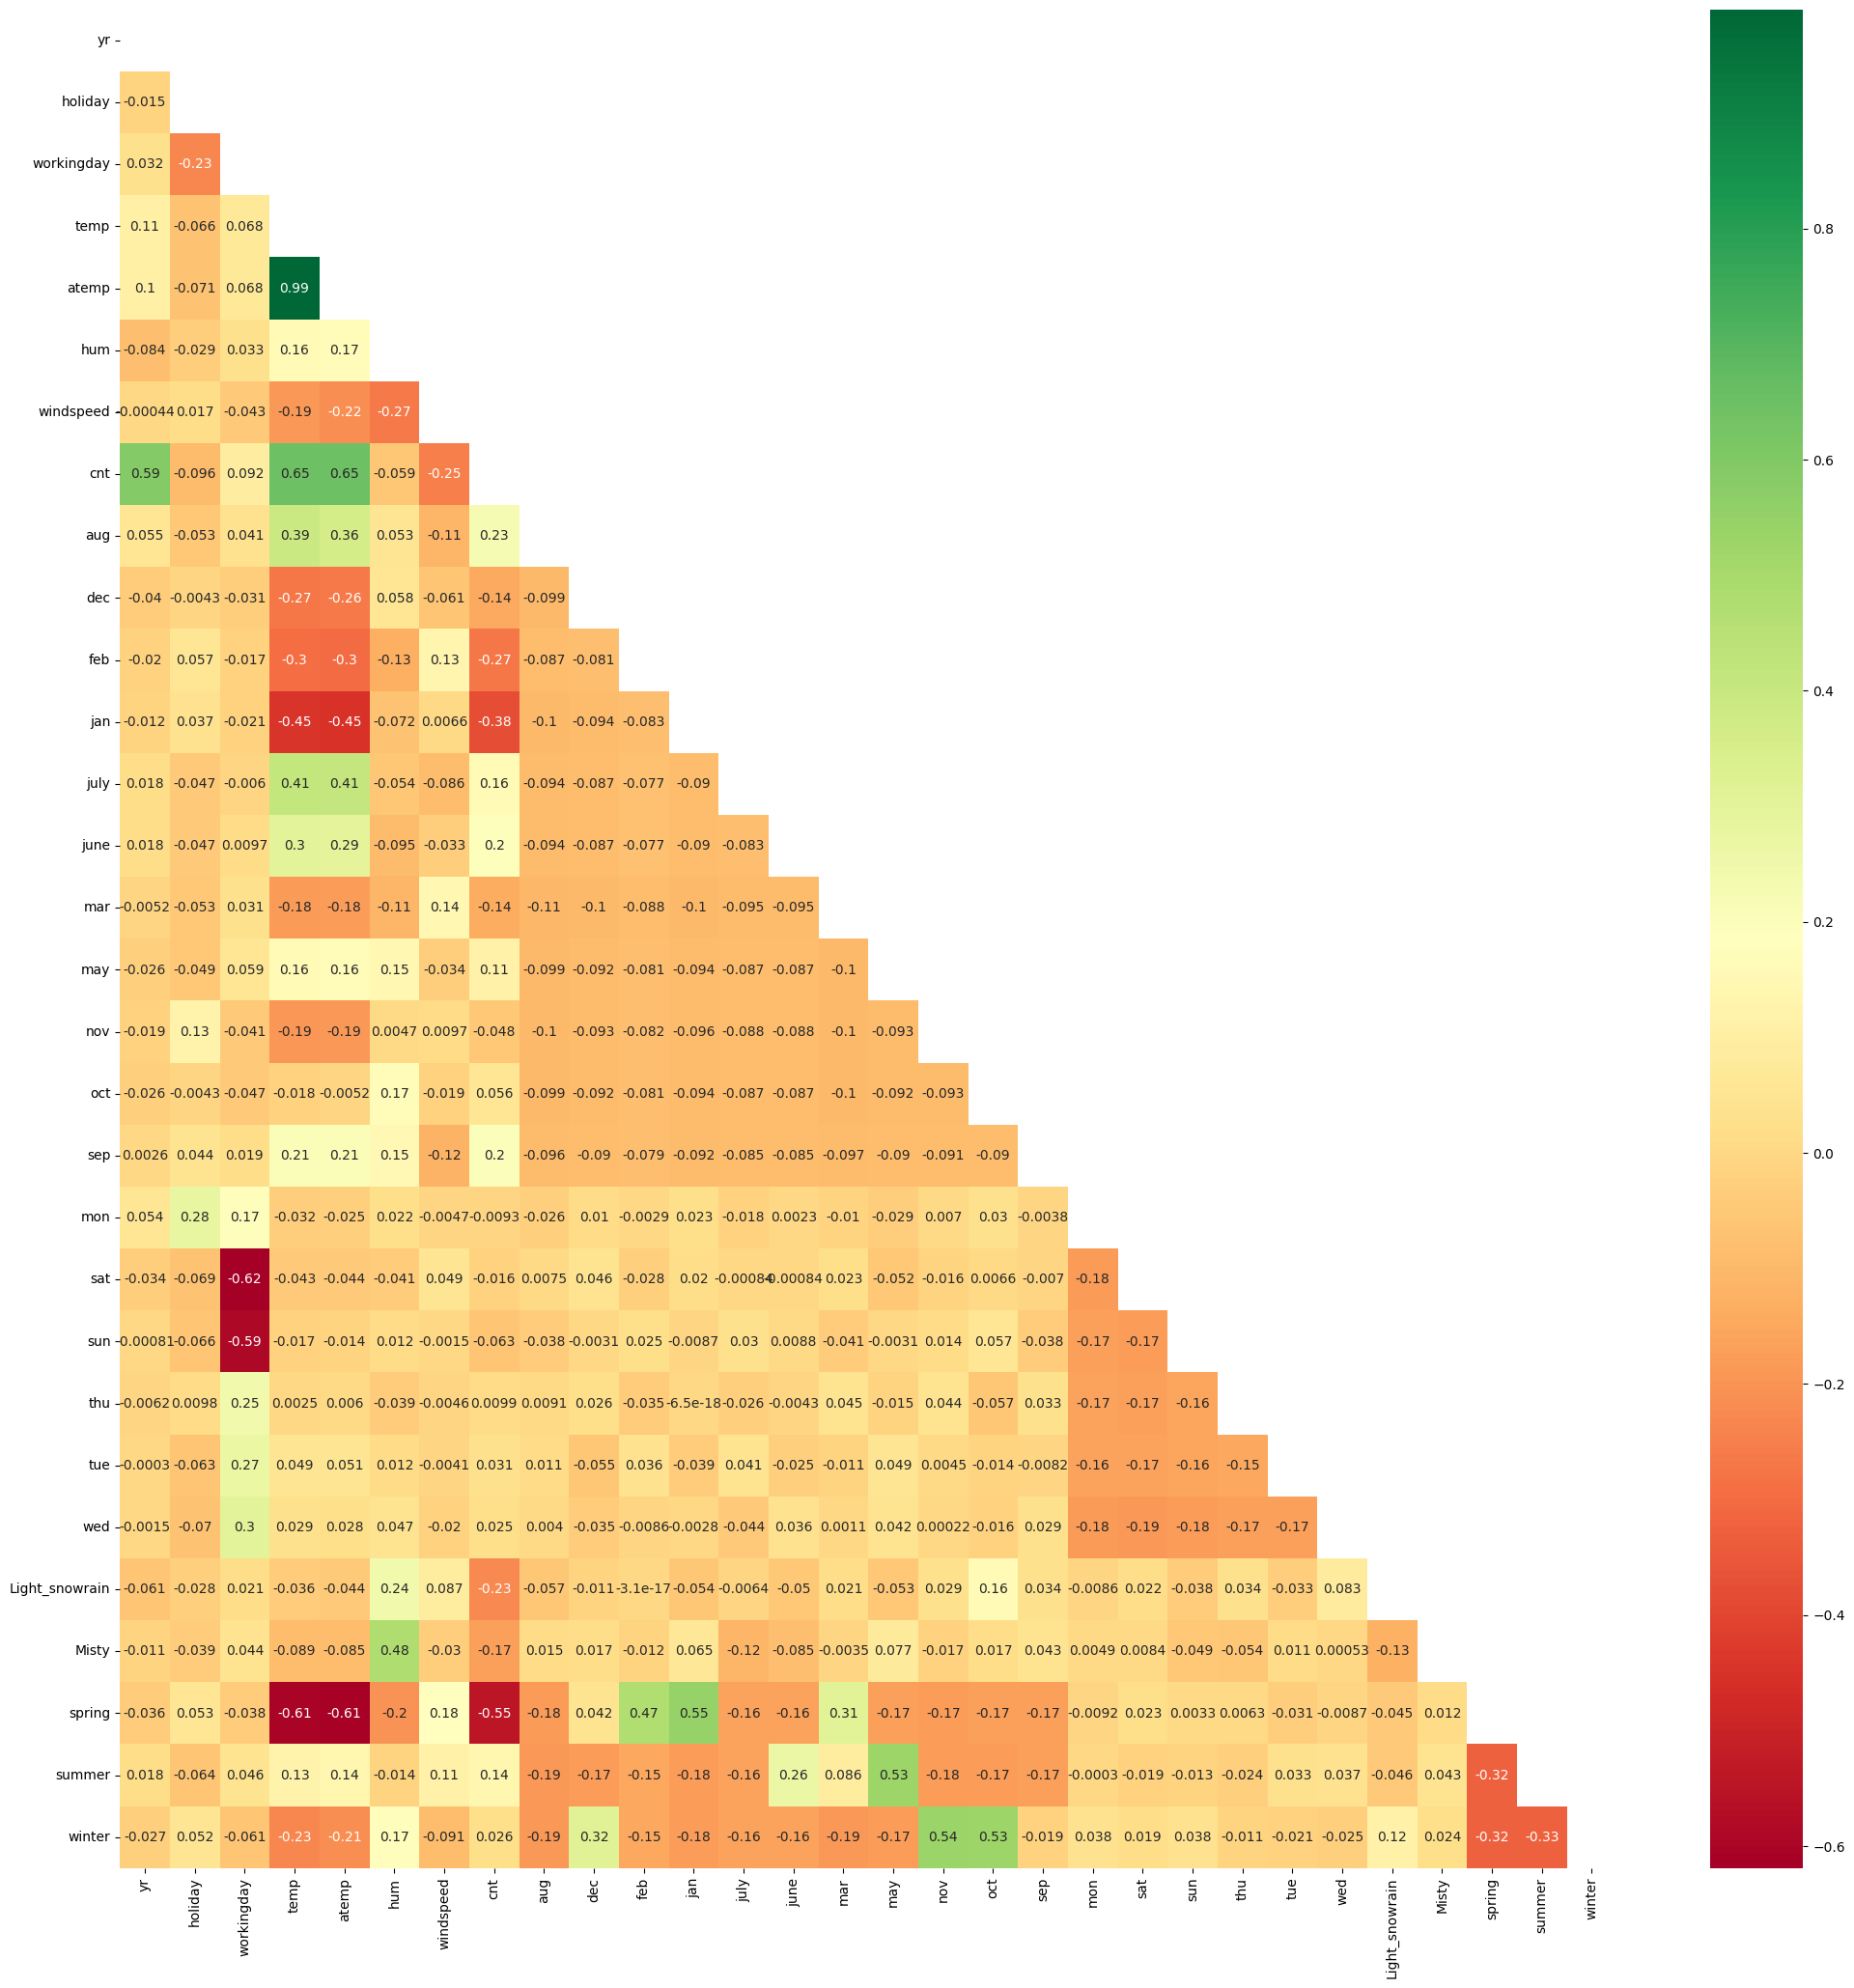

In [34]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

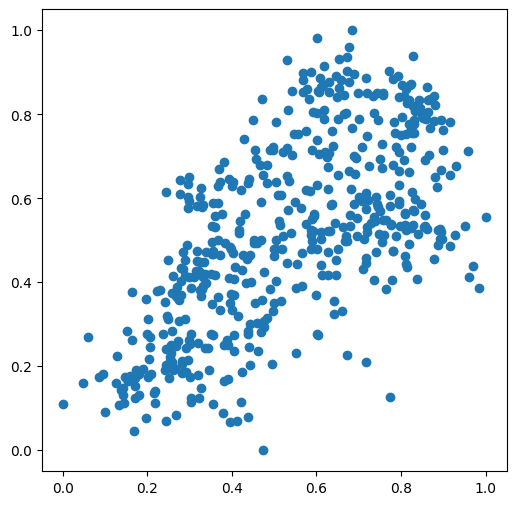

In [35]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### the above plot confirms positive correlation between temp and cnt

In [36]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
# Recursive feature elimination 

ridgem = Ridge()
ridgem.fit(X_train, y_train)

rfe = RFE(ridgem,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: [ True  True False  True  True  True  True False  True False  True  True
 False False False  True False  True False False False False False False
  True  True  True False  True]


In [38]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('mar', False, 15),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', False, 2),
 ('sun', False, 9),
 ('thu', False, 13),
 ('tue', False, 11),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1)]

In [39]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
# col = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'jan',
       # 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'winter']
print(col)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


In [40]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [41]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    # df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values.astype(float), i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [42]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [43]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,351.95
3,atemp,351.87
4,hum,25.11
5,windspeed,4.17
14,winter,3.01
13,spring,2.94
12,Misty,2.27
0,yr,2.07
9,nov,1.83
7,jan,1.75


#### humidity shows high VIF value

# Building a Linear Model

In [44]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1.astype(float)).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          2.77e-187
Time:                        23:14:13   Log-Likelihood:                 510.53
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     494   BIC:                            -921.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3663      0.032     11.

In [45]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,351.36
3,atemp,344.32
4,windspeed,4.13
13,winter,2.62
12,spring,2.39
0,yr,2.06
8,nov,1.81
6,jan,1.65
11,Misty,1.54
5,dec,1.47


### Checking further if any more features can be dropped

In [46]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2.astype(float)).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          5.38e-185
Time:                        23:14:13   Log-Likelihood:                 502.34
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     495   BIC:                            -911.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2883      0.026     11.

In [47]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,351.29
3,atemp,344.31
4,windspeed,4.09
11,spring,2.39
0,yr,2.06
12,winter,1.70
6,jan,1.64
10,Misty,1.54
7,july,1.36
5,dec,1.29


#### After dropping two features, there is no change in the VIF. Hence proceeding with further analysis

In [48]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3.astype(float)).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          7.62e-185
Time:                        23:14:13   Log-Likelihood:                 499.23
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     496   BIC:                            -911.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2762      0.025     10.

In [49]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,351.06
3,atemp,344.14
4,windspeed,4.09
10,spring,2.27
0,yr,2.06
5,jan,1.60
9,Misty,1.54
11,winter,1.46
6,july,1.36
7,sep,1.20


In [50]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4.astype(float)).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.95e-185
Time:                        23:14:13   Log-Likelihood:                 497.13
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     497   BIC:                            -913.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2653      0.025     10.

In [51]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,351.04
3,atemp,344.06
4,windspeed,4.08
0,yr,2.06
9,spring,1.67
8,Misty,1.52
10,winter,1.46
5,july,1.36
6,sep,1.20
7,Light_snowrain,1.08


In [52]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5.astype(float)).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.18e-185
Time:                        23:14:13   Log-Likelihood:                 494.26
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     498   BIC:                            -913.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2511      0.024     10.

In [53]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,348.56
3,atemp,343.63
4,windspeed,4.02
0,yr,2.05
8,spring,1.67
7,Misty,1.50
9,winter,1.44
5,sep,1.16
6,Light_snowrain,1.08
1,holiday,1.04


#### VIF seems to feasible now with all values below 5

In [54]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6.astype(float)).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.25e-182
Time:                        23:14:13   Log-Likelihood:                 485.56
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     499   BIC:                            -902.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2661      0.024     10.

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [55]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.266139
yr                0.235592
holiday          -0.095762
temp              0.321559
atemp             0.090988
windspeed        -0.132090
sep               0.069723
Light_snowrain   -0.286527
Misty            -0.077090
spring           -0.117608
winter            0.044748
dtype: float64

# Residual Analysis of Train data and validation

In [56]:
y_train_pred = lr_6.predict(X_train_lm_6)

### Normality of error terms

Text(0.5, 0, 'Errors')

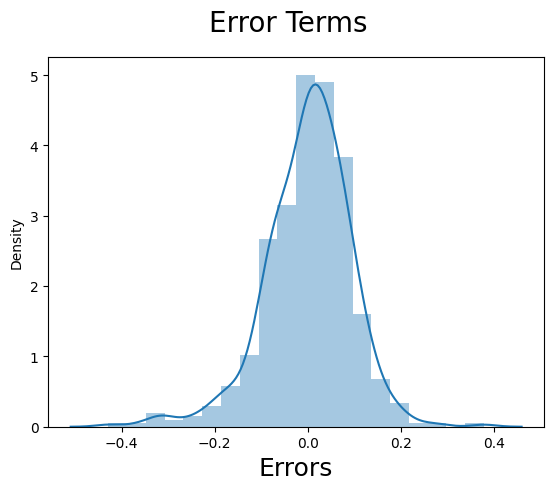

In [57]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### by observation, error terms is following nomral distribution

## Multicollinearity

In [58]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,348.56
3,atemp,343.63
4,windspeed,4.02
0,yr,2.05
8,spring,1.67
7,Misty,1.50
9,winter,1.44
5,sep,1.16
6,Light_snowrain,1.08
1,holiday,1.04


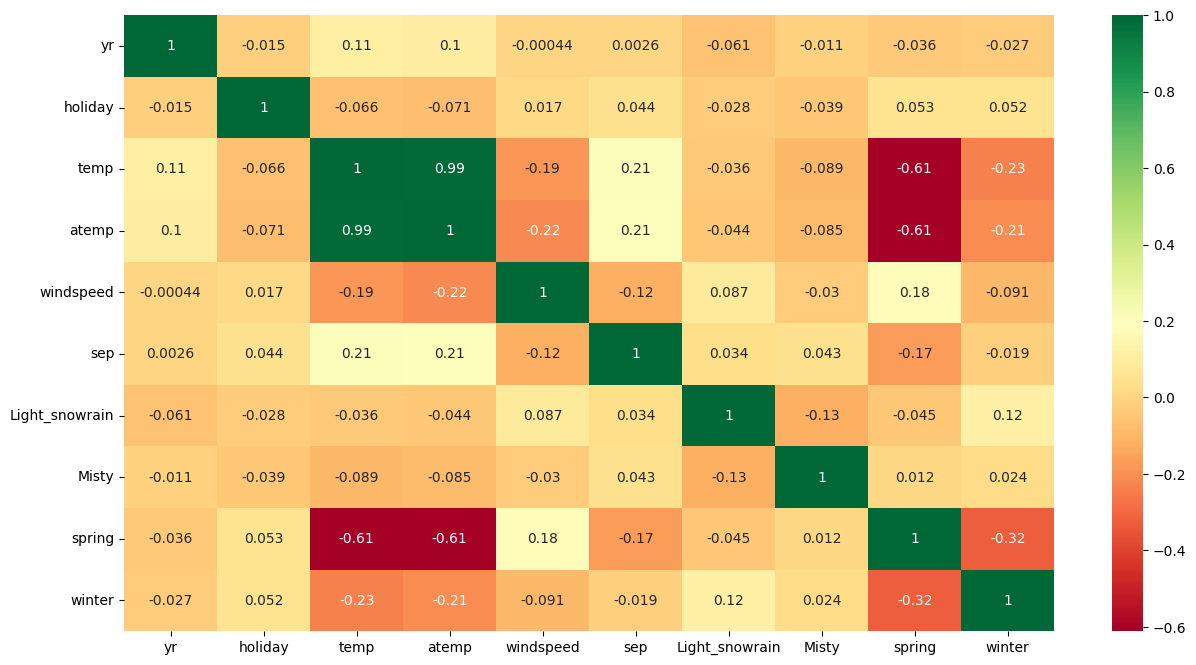

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Clear from heat map that there is no multicollinearity

## Linearity

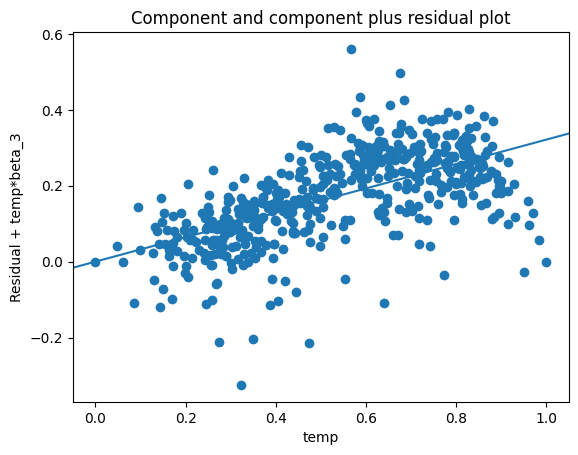

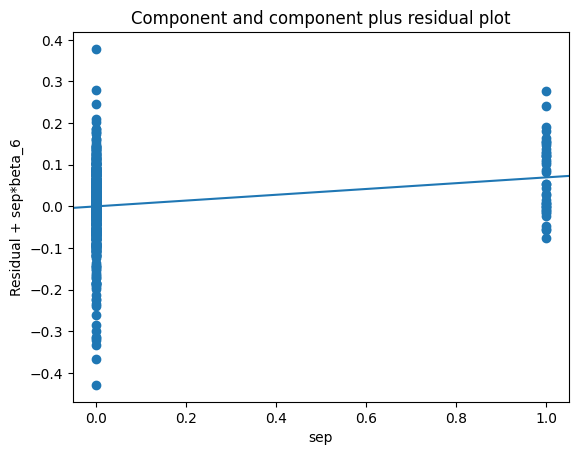

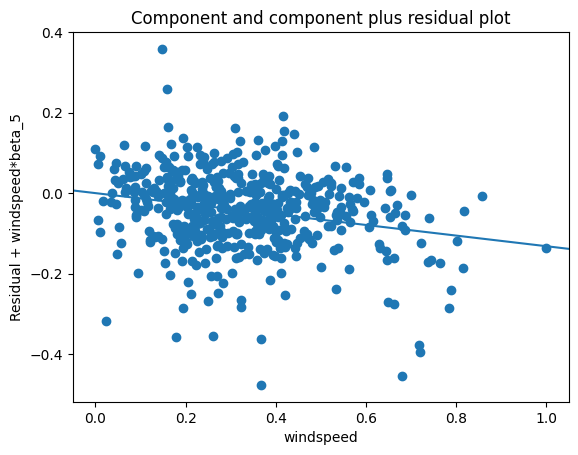

In [60]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

#### Homoscedasticity

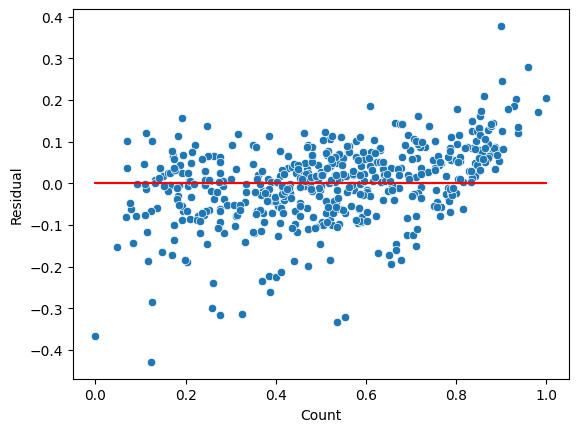

In [61]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [62]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [66]:
y_pred = lr_6.predict(X_test_lm_6)

In [67]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8051

## Step 8: Model Evaluation
plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

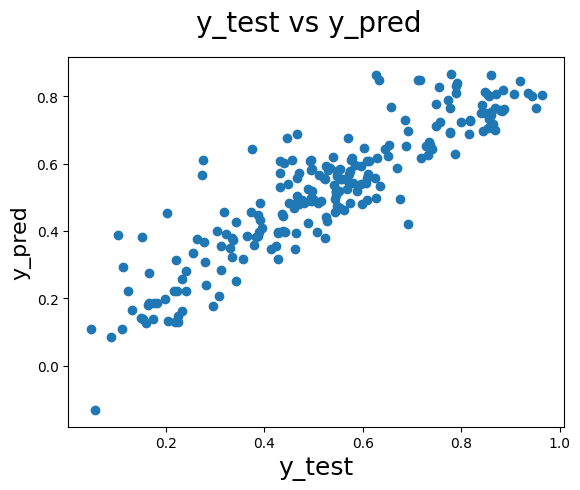

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [69]:
round(lr_6.params,4)

const             0.2661
yr                0.2356
holiday          -0.0958
temp              0.3216
atemp             0.0910
windspeed        -0.1321
sep               0.0697
Light_snowrain   -0.2865
Misty            -0.0771
spring           -0.1176
winter            0.0447
dtype: float64

Hence, the equation of best fitted line is:

$ cnt = 0.1909 + 0.2341  *  year - 0.0963  *  holiday + 0.4777 * temp - 0.1481 * windspeed + 0.0910 * sep - 0.2850 * Light_snowrain - 0.0787 * Misty - 0.0554 * spring + 0.0621 * summer + 0.0945 * winter $

In [70]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7957


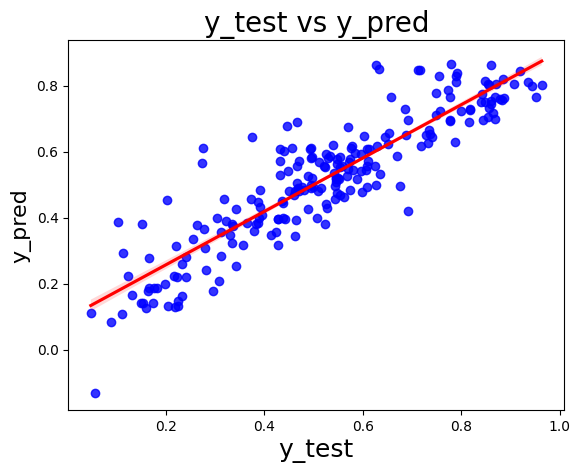

In [71]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test.astype(float), y=y_pred.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Training and Testing dataset comparison:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### The real Factors which are attracting the demand of bikes are year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter. 